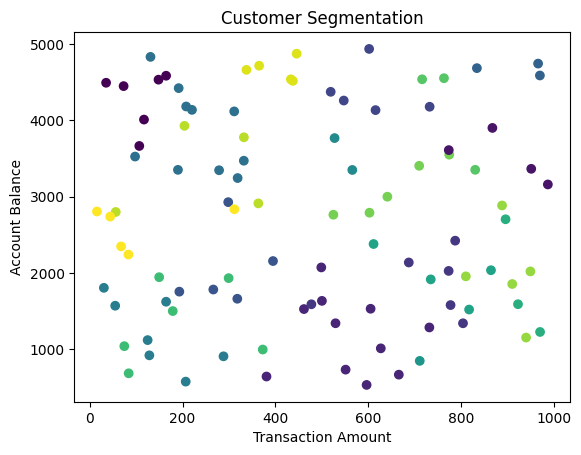

    TransactionAmount  AccountBalance  TransactionFrequency
0          107.358831     4288.233542              6.666667
1          894.824315     3508.016260              2.250000
2          558.946583     1178.633636              3.636364
3          717.836948     1848.274906              5.833333
4          603.265336     4375.711299              3.000000
5          294.035591     2055.698565              4.400000
6          923.327570     4671.309863              7.666667
7          227.825619     3861.998880              2.700000
8          142.507229     1216.260202              6.142857
9          546.584963     3557.878556              7.500000
10         710.991852      846.409594              9.000000
11         756.980653     1961.745249              2.000000
12         929.581774     1839.093979              9.666667
13         193.076918     1348.687838              2.166667
14         769.913224     4146.745289              6.333333
15         650.606446     3100.268910   

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = pd.DataFrame({
    'TransactionAmount': np.random.uniform(10, 1000, 100),
    'AccountBalance': np.random.uniform(500, 5000, 100),
    'TransactionFrequency': np.random.poisson(5, 100)
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (you may want to experiment with this)
num_clusters = 20

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for two features)
plt.scatter(data['TransactionAmount'], data['AccountBalance'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
print(cluster_centers_df)